In [1]:
import matplotlib.pyplot as plt # Mengimpor modul pyplot dari matplotlib
%matplotlib inline

# Mengimpor library matplotlib untuk menampilkan gambar dan grafik secara interaktif di notebook
from skimage import data
from skimage.io import imread
from skimage.color import rgb2gray 
import numpy as np # Mengimpor modul NumPy

Shape citra 1 :  (252, 250)
Shape citra 1 :  (636, 512)


Text(0.5, 1.0, 'Citra 2')

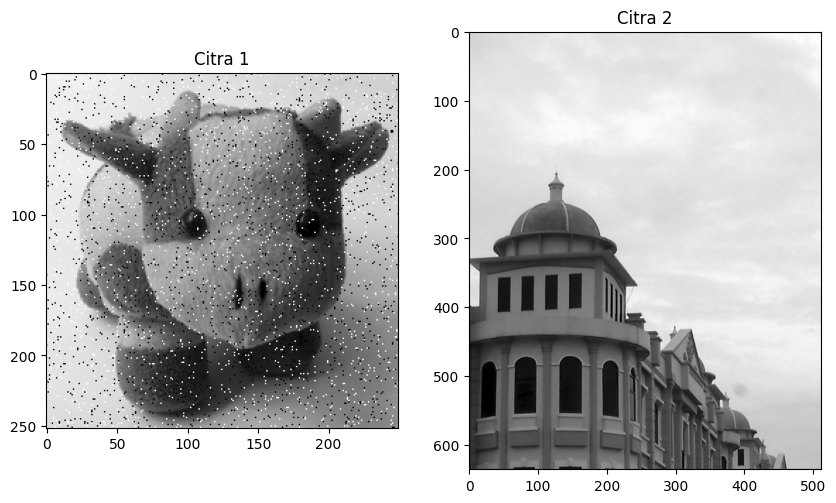

In [2]:
citra1 = imread(fname="boneka2.tif")  # Membaca citra 
citra2 = imread(fname="gedung.tif")  # Membaca citra 

print('Shape citra 1 : ', citra1.shape)  # Menampilkan dimensi citra1 (shape).
print('Shape citra 1 : ', citra2.shape)  # Menampilkan dimensi citra2 (shape).

fig, axes = plt.subplots(1, 2, figsize=(10, 10))  # Membuat subplot 
ax = axes.ravel()  # Meratakan array subplot menjadi array satu dimensi.

ax[0].imshow(citra1, cmap='gray')  # Menampilkan citra1 
ax[0].set_title("Citra 1")  # Memberikan judul

ax[1].imshow(citra2, cmap='gray')  # Menampilkan citra2 
ax[1].set_title("Citra 2")  # Memberikan judul 


In [3]:
#for baris=2 : tinggi-1
#    for kolom=2 : lebar-1
#        minPiksel = min([F(baris-1, kolom-1) F(baris-1, kolom) F(baris, kolom+1) ...
#            F(baris, kolom-1) F(baris, kolom+1) F(baris+1, kolom-1)  ...
#            F(baris+1, kolom) F(baris+1, kolom+1)]);
#        
#        maksPiksel = max([F(baris-1, kolom-1) F(baris-1, kolom) F(baris, kolom+1)    ...
#            F(baris, kolom-1) F(baris, kolom+1) F(baris+1, kolom-1)  ...
#            F(baris+1, kolom) F(baris+1, kolom+1)]);    
#            
#        if F(baris, kolom) < minPiksel
#           G(baris, kolom) = minPiksel;
#        else
#            if F(baris, kolom) > maksPiksel
#                G(baris, kolom) = maksPiksel;
#            else
#                G(baris, kolom) = F(baris, kolom);
#            end
#        end    
#    end
#end

In [4]:
copyCitra1 = citra1.copy()  # Menduplikasi citra1 ke copyCitra1.
copyCitra2 = citra2.copy()  # Menduplikasi citra2 ke copyCitra2.

m1,n1 = copyCitra1.shape  # Mengambil dimensi baris dan kolom dari copyCitra1.
output1 = np.empty([m1, n1])  # Membuat array kosong dengan dimensi yang sama dengan copyCitra1 untuk menyimpan hasil output.

m2,n2 = copyCitra2.shape  # Mengambil dimensi baris dan kolom dari copyCitra2.
output2 = np.empty([m2, n2])  # Membuat array kosong dengan dimensi yang sama dengan copyCitra2 untuk menyimpan hasil output.

print('Shape copy citra 1 : ', copyCitra1.shape)  # Menampilkan dimensi copyCitra1.
print('Shape output citra 1 : ', output1.shape)  # Menampilkan dimensi output1.

print('m1 : ',m1)  # Menampilkan nilai m1 (jumlah baris copyCitra1).
print('n1 : ',n1)  # Menampilkan nilai n1 (jumlah kolom copyCitra1).
print()

print('Shape copy citra 2 : ', copyCitra2.shape)  # Menampilkan dimensi copyCitra2.
print('Shape output citra 3 : ', output2.shape)  # Menampilkan dimensi output2.

print('m2 : ',m2)  # Menampilkan nilai m2 (jumlah baris copyCitra2).
print('n2 : ',n2)  # Menampilkan nilai n2 (jumlah kolom copyCitra2).
print()


Shape copy citra 1 :  (252, 250)
Shape output citra 1 :  (252, 250)
m1 :  252
n1 :  250

Shape copy citra 2 :  (636, 512)
Shape output citra 3 :  (636, 512)
m2 :  636
n2 :  512



In [5]:
for baris in range(0, m1-1):  # Melakukan iterasi untuk setiap baris dalam rentang (0, m1-1).
    for kolom in range(0, n1-1):  # Melakukan iterasi untuk setiap kolom dalam rentang (0, n1-1).

        a1 = baris  # Menyimpan nilai baris saat ini ke variabel a1.
        b1 = kolom  # Menyimpan nilai kolom saat ini ke variabel b1.

        arr = np.array([copyCitra1[a1-1, b1-1], copyCitra1[a1-1, b1], copyCitra1[a1, b1+1], \
            copyCitra1[a1, b1-1], copyCitra1[a1, b1+1], copyCitra1[a1+1, b1-1], \
            copyCitra1[a1+1, b1], copyCitra1[a1+1, b1+1]])  # Membuat array berisi piksel sekitar pada copyCitra1.

        minPiksel = np.amin(arr)  # Menyimpan nilai piksel minimum dari array.
        maksPiksel = np.amax(arr)  # Menyimpan nilai piksel maksimum dari array.

        if copyCitra1[baris, kolom] < minPiksel:  # Memeriksa apakah piksel saat ini lebih kecil dari piksel minimum.
            output1[baris, kolom] = minPiksel  # Jika iya, set nilai output1 dengan piksel minimum.
        else:
            if copyCitra1[baris, kolom] > maksPiksel:  # Jika tidak, periksa apakah piksel saat ini lebih besar dari piksel maksimum.
                output1[baris, kolom] = maksPiksel  # Jika iya, set nilai output1 dengan piksel maksimum.
            else:
                output1[baris, kolom] = copyCitra1[baris, kolom]  # Jika tidak, set nilai output1 dengan piksel saat ini.


In [6]:
for baris1 in range(0, m2-1):  # Melakukan iterasi untuk setiap baris dalam rentang (0, m2-1).
    for kolom1 in range(0, n2-1):  # Melakukan iterasi untuk setiap kolom dalam rentang (0, n2-1).

        a1 = baris1  # Menyimpan nilai baris saat ini ke variabel a1.
        b1 = kolom1  # Menyimpan nilai kolom saat ini ke variabel b1.

        arr = np.array([copyCitra2[a1-1, b1-1], copyCitra2[a1-1, b1], copyCitra2[a1, b1+1], \
            copyCitra2[a1, b1-1], copyCitra2[a1, b1+1], copyCitra2[a1+1, b1-1], \
            copyCitra2[a1+1, b1], copyCitra2[a1+1, b1+1]])  # Membuat array berisi piksel sekitar pada copyCitra2.

        minPiksel = np.amin(arr)  # Menyimpan nilai piksel minimum dari array.
        maksPiksel = np.amax(arr)  # Menyimpan nilai piksel maksimum dari array.

        if copyCitra2[baris1, kolom1] < minPiksel:  # Memeriksa apakah piksel saat ini lebih kecil dari piksel minimum.
            output2[baris1, kolom1] = minPiksel  # Jika iya, set nilai output2 dengan piksel minimum.
        else:
            if copyCitra2[baris1, kolom1] > maksPiksel:  # Jika tidak, periksa apakah piksel saat ini lebih besar dari piksel maksimum.
                output2[baris1, kolom1] = maksPiksel  # Jika iya, set nilai output2 dengan piksel maksimum.
            else:
                output2[baris1, kolom1] = copyCitra2[baris1, kolom1]  # Jika tidak, set nilai output2 dengan piksel saat ini.


Text(0.5, 1.0, 'Output Citra 2')

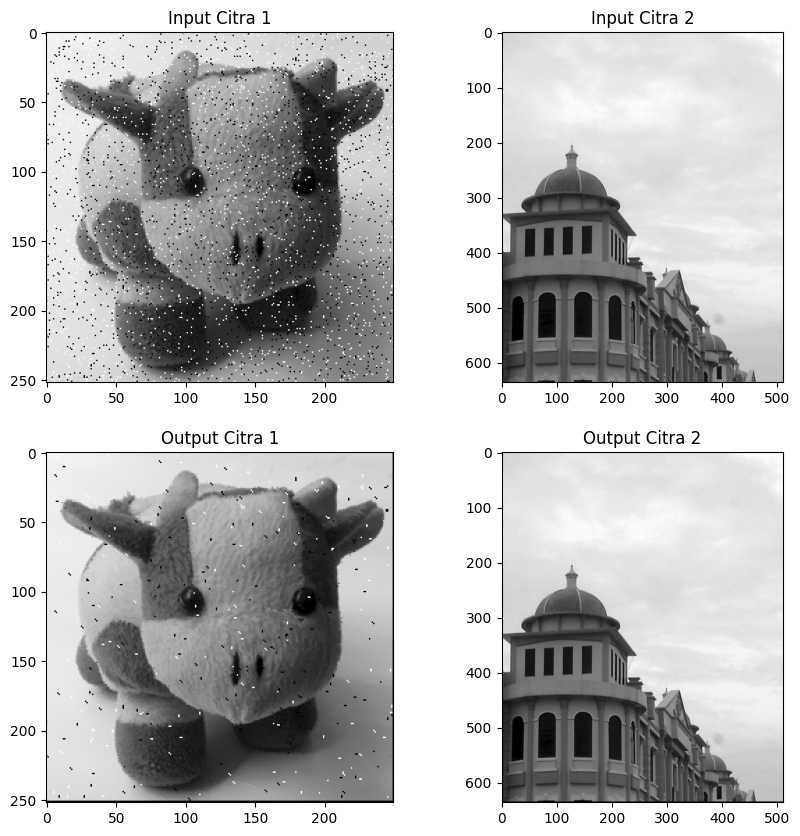

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))  # Membuat subplot dengan ukuran 2x2 dan ukuran gambar (figsize) 10x10.
ax = axes.ravel()  # Mengubah array 2D menjadi array 1D.

ax[0].imshow(citra1, cmap='gray')  # Menampilkan citra1 pada subplot indeks 0 dengan peta warna 'gray'.
ax[0].set_title("Input Citra 1")  # Memberikan judul "Input Citra 1" pada subplot indeks 0.

ax[1].imshow(citra2, cmap='gray')  # Menampilkan citra2 pada subplot indeks 1 dengan peta warna 'gray'.
ax[1].set_title("Input Citra 2")  # Memberikan judul "Input Citra 2" pada subplot indeks 1.

ax[2].imshow(output1, cmap='gray')  # Menampilkan output1 pada subplot indeks 2 dengan peta warna 'gray'.
ax[2].set_title("Output Citra 1")  # Memberikan judul "Output Citra 1" pada subplot indeks 2.

ax[3].imshow(output2, cmap='gray')  # Menampilkan output2 pada subplot indeks 3 dengan peta warna 'gray'.
ax[3].set_title("Output Citra 2")  # Memberikan judul "Output Citra 2" pada subplot indeks 3.
